### 1. Importing the necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')
import calendar
import datetime as dt
import plotly.io as plio
plio.templates
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from IPython.display import HTML,display

### 2. Exploring the dataset

In [2]:
unemp = pd.read_csv('data/Unemployment in India.csv')
unemp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
unemp.shape

(768, 7)

#### From the dataset inforrmation section we can infer that there are 740 non-null rows in each of the 7 columns
#### Also from dataset shape we can infer that there are 754 rows (null + non-null) in each of the 7 columns
#### So there are 754 - 740 = 14 null values in each of the 7 columns of the dataset

In [5]:
unemp.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
unemp[unemp.isnull().any(axis=1)]
print(unemp[unemp.isnull().any(axis=1)].index.tolist())

[359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767]


#### From above we can infer that there are null-values from row number 359 to 372 in each of the seven columns

#### So we will remove these rows ; and make a new dataset

In [7]:
unemp_non_null = unemp.iloc[:, :360].dropna()
unemp_non_null

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [8]:
unemp_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [9]:
unemp_non_null.shape

(740, 7)

In [10]:
unemp_non_null.columns = unemp_non_null.columns.str.strip()

unemp_non_null.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [11]:
unemp_non_null.Date.min(),unemp_non_null.Date.max() 

(' 29-02-2020', ' 31-12-2019')

#### Hence, we have removed all the rows from row number 359 to row number 372 that consisted of null values from all of the 7 columns

#### Since, the null values were present in same rows from 359 to 372 in all of the 7 columns; we removed them without following the process the imputing

### 3. Data Transformation

In [12]:
unemp_non_null['Date'] = pd.to_datetime(unemp_non_null['Date'],dayfirst=True)

In [13]:
unemp_non_null['Frequency']= unemp_non_null['Frequency'].astype('category')

In [14]:
unemp_non_null['Month'] =  unemp_non_null['Date'].dt.month

In [15]:
unemp_non_null['Month_num'] = unemp_non_null['Month'].apply(lambda x : int(x))

In [16]:
unemp_non_null['Month_name'] =  unemp_non_null['Month_num'].apply(lambda x: calendar.month_abbr[x])

In [17]:
unemp_non_null['Region'] = unemp_non_null['Region'].astype('category')

In [18]:
unemp_non_null['Year'] =  unemp_non_null['Date'].dt.year
unemp_non_null['Year_num'] = unemp_non_null['Year'].apply(lambda x : int(x))

In [19]:
unemp_non_null.drop(columns='Year', inplace=True)

In [20]:
unemp_non_null

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Month_num,Month_name,Year_num
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,5,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,6,Jun,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,7,Jul,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,8,Aug,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,9,Sep,2019
...,...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,2,Feb,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,3,Mar,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,4,Apr,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,5,May,2020


### 4. Using correlation, pairplot and scatterplot to understand the relation between the features

In [21]:
unemp_non_null.select_dtypes(include='number').corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Month,Month_num,Year_num
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558,-0.122938,-0.122938,0.262602
Estimated Employed,-0.222876,1.000000,0.011300,0.011285,0.011285,-0.031841
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000,0.087257,0.087257,-0.182460
Month,-0.122938,0.011285,0.087257,1.000000,1.000000,-0.768484
Month_num,-0.122938,0.011285,0.087257,1.000000,1.000000,-0.768484
Year_num,0.262602,-0.031841,-0.182460,-0.768484,-0.768484,1.000000


<Axes: >

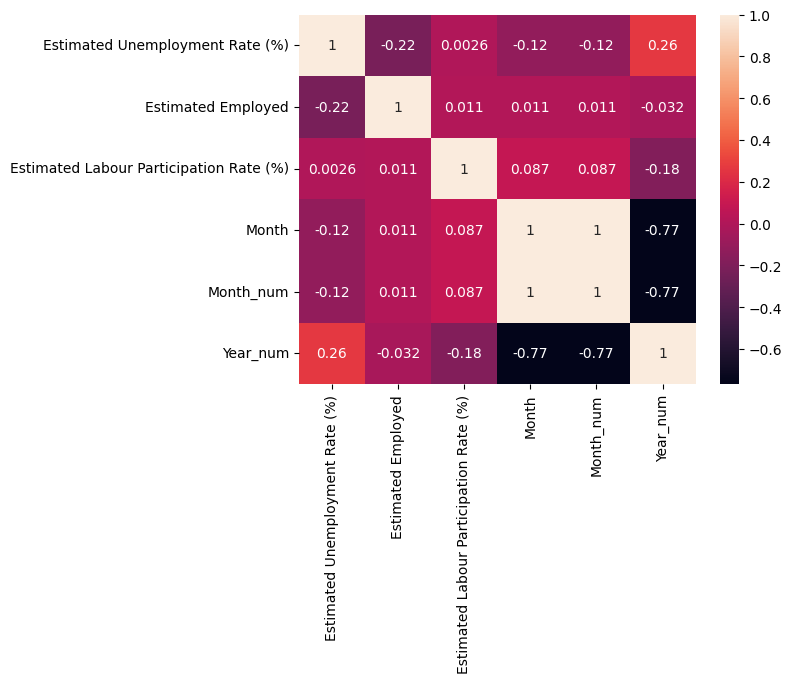

In [22]:
sns.heatmap(unemp_non_null.select_dtypes(include='number').corr(), annot=True)

<Figure size 2000x600 with 0 Axes>

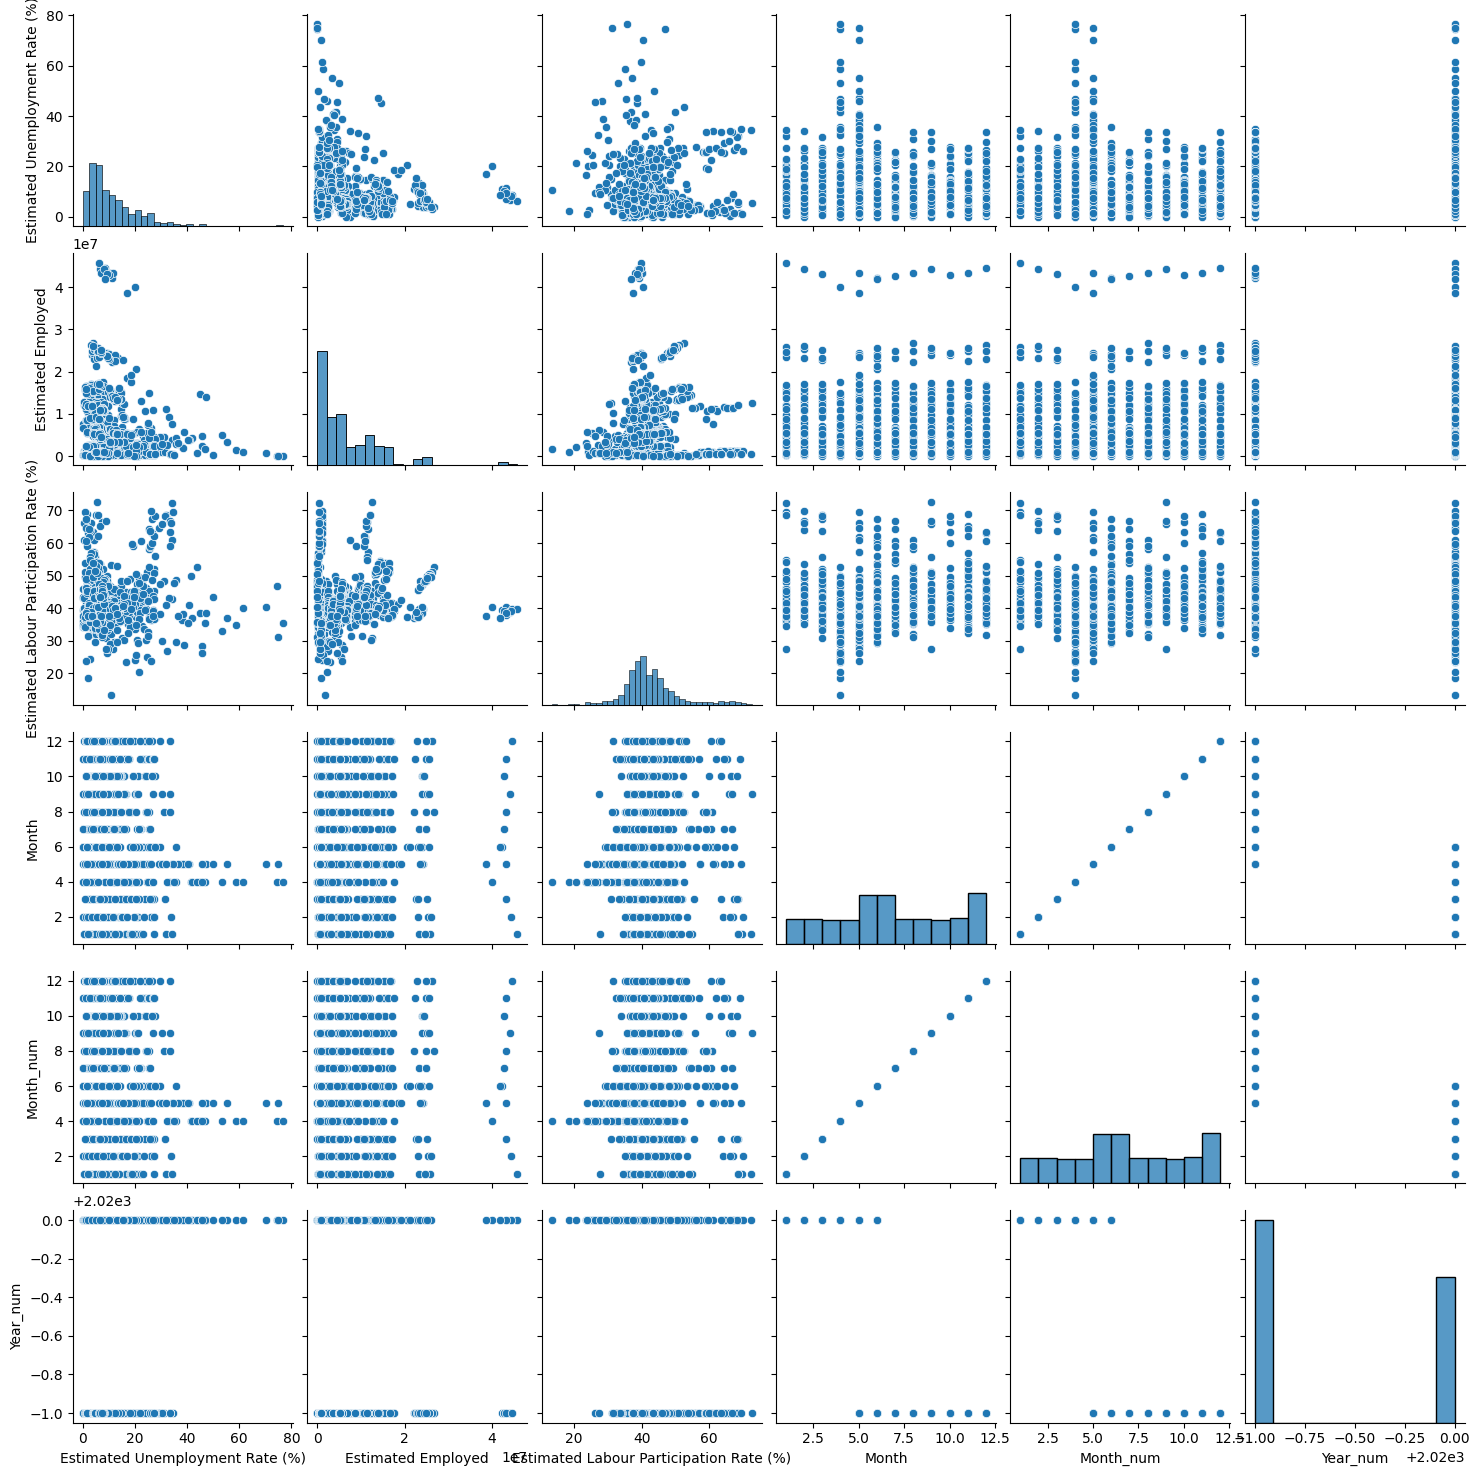

In [23]:
plt.figure(figsize=(20,6))
sns.pairplot(unemp_non_null.select_dtypes(include='number'))
plt.show()

In [24]:
plt.figure(figsize=(20,20))
fig = px.scatter_matrix(unemp_non_null,template='plotly',
    dimensions=['Estimated Unemployment Rate (%)','Estimated Employed',
                'Estimated Labour Participation Rate (%)'],
    color='Region')
fig.show()

<Figure size 2000x2000 with 0 Axes>

In [25]:
plt.figure(figsize=(20,16))
fig = px.scatter_matrix(unemp_non_null,template='plotly',
    dimensions=['Estimated Unemployment Rate (%)','Estimated Employed',
                'Estimated Labour Participation Rate (%)'],
    color='Area')
fig.show()

<Figure size 2000x1600 with 0 Axes>

### 6. Exploratory Data Analysis

#### Estimated Unemployment Rate(%)

In [26]:
plt.figure(figsize=(20,15))
fig = px.box(unemp_non_null,x='Region',y='Estimated Unemployment Rate (%)',color='Region',title='Estimated Unemployment rate(%) vs State',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

<Figure size 2000x1500 with 0 Axes>

In [27]:
plt.figure(figsize=(20,15))
fig = px.box(unemp_non_null,x='Area',y='Estimated Unemployment Rate (%)',color='Area',title='Estimated Unemployment rate(%) vs Area',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

<Figure size 2000x1500 with 0 Axes>

In [28]:
df_est_unemp_rate_vs_region = unemp_non_null[['Estimated Unemployment Rate (%)','Region']]

df_est_unemp_rate_vs_region = df_est_unemp_rate_vs_region.groupby('Region').mean().reset_index()

df_est_unemp_rate_vs_region = df_est_unemp_rate_vs_region.sort_values('Estimated Unemployment Rate (%)')

fig = px.bar(df_est_unemp_rate_vs_region, x='Region',y='Estimated Unemployment Rate (%)',color='Region',
            title='Average Estimated Unemployment Rate(%) in each state',template='plotly', text='Estimated Unemployment Rate (%)', height=1000)

fig.show()

In [29]:
unemp_2020 = unemp_non_null[unemp_non_null['Year_num'] == 2020]
unemp_2019 = unemp_non_null[unemp_non_null['Year_num'] == 2019]

In [30]:
plt.figure(figsize=(20,30))
fig = px.bar(unemp_2020, x='Region',y='Estimated Unemployment Rate (%)',animation_frame = 'Month_name' ,color='Area',
        title='Estimated Unemployment rate across Region(States) during year 2020', height=900,template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

<Figure size 2000x3000 with 0 Axes>

In [31]:
plt.figure(figsize=(20,30))
fig = px.bar(unemp_2019, x='Region',y='Estimated Unemployment Rate (%)',animation_frame = 'Month_name' ,color='Area',
        title='Estimated Unemployment rate across Region(States) during year 2019', height=700,template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

<Figure size 2000x3000 with 0 Axes>

In [32]:
fig = px.sunburst(unemp_non_null.groupby(['Region'])['Estimated Unemployment Rate (%)'].mean().reset_index(),
                  path=['Region'], values='Estimated Unemployment Rate (%)',
                  color_continuous_scale='Plasma', title='Estimated Unemployment Rate (%) by Region(State)',
                  height=950, template='ggplot2',custom_data=['Estimated Unemployment Rate (%)'])

fig.update_traces(textinfo='label+value')

fig.show()

#### From the pieplot, avg. unemployment rate(%) bar plot and box plots we can infer the following:-</p>
#### The top 5 regions(states) in India having the highest unemployement rate (%) during COVID-19 lockdown are:</p>
#### 1. Tripura = 28.35%</p>
#### 2. Haryana = 26.28%</p>
#### 3. Jharkhand = 20.59%</p>
#### 4. Bihar = 18.92%</p>
#### 5. Himachal Pradesh = 18.54%</p>

#### Estimated Employed Count

In [33]:
plt.figure(figsize=(20,15))
fig = px.box(unemp_non_null,x='Region',y='Estimated Employed',color='Region',title='Estimated Employed Count vs State',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

<Figure size 2000x1500 with 0 Axes>

In [34]:
plt.figure(figsize=(20,15))
fig = px.box(unemp_non_null,x='Area',y='Estimated Employed',color='Area',title='Estimated Employed Count vs Area',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

<Figure size 2000x1500 with 0 Axes>

In [35]:
df_est_emp_vs_region = unemp_non_null[['Estimated Employed','Region']]

df_est_emp_vs_region = df_est_emp_vs_region.groupby('Region').mean().reset_index()

df_est_emp_vs_region = df_est_emp_vs_region.sort_values('Estimated Employed')

fig = px.bar(df_est_emp_vs_region, x='Region',y='Estimated Employed',color='Region',
            title='Average Estimated Employed in each state',template='plotly', text='Estimated Employed', height=1000)

fig.show()

In [36]:
plt.figure(figsize=(20,25))
fig = px.bar(unemp_2020, x='Region',y='Estimated Employed',animation_frame = 'Month_name' ,color='Area',
            title='Estimated Employed count across Region(States) in India in 2020', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

<Figure size 2000x2500 with 0 Axes>

In [37]:
plt.figure(figsize=(20,25))
fig = px.bar(unemp_2019, x='Region',y='Estimated Employed',animation_frame = 'Month_name' ,color='Area',
            title='Estimated Employed count across Region(States) of India in 2019', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

<Figure size 2000x2500 with 0 Axes>

In [38]:
fig = px.sunburst(unemp_non_null.groupby(['Region'])['Estimated Employed'].mean().reset_index(),
                  path=['Region'], values='Estimated Employed',
                  color_continuous_scale='Plasma', title='Estimated Employed Count by Region(State)',
                  height=1050, template='ggplot2',custom_data=['Estimated Employed'])

fig.update_traces(textinfo='label+value')

fig.show()

#### From the pieplot, avg. employed count bar plot and box plots we can infer the following:-</p>
#### The top 5 regions(states) in India having the highest employed count during COVID-19 lockdown are:</p>
#### 1. Uttar Pradesh = 28.09 Million </p>
#### 2. Maharashtra = 19.99 Million</p>
#### 3. West Bengal = 17.19 Million </p>
#### 4. Bihar = 12.37 Million</p>
#### 5. Tamil Nadu = 12.27 Million</p>

#### Estimated Labour Participation Rate (%)

In [39]:
plt.figure(figsize=(20,15))
fig = px.box(unemp_non_null,x='Region',y='Estimated Labour Participation Rate (%)',color='Region',title='Estimated Labour Participation Rate (%) vs State',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

<Figure size 2000x1500 with 0 Axes>

In [40]:
plt.figure(figsize=(20,15))
fig = px.box(unemp_non_null,x='Area',y='Estimated Labour Participation Rate (%)',color='Area',title='Estimated Labour Participation rate(%) vs Area',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

<Figure size 2000x1500 with 0 Axes>

In [41]:
df_est_lab_par_rate_vs_region = unemp_non_null[['Estimated Labour Participation Rate (%)','Region']]

df_est_lab_par_rate_vs_region = df_est_lab_par_rate_vs_region.groupby('Region').mean().reset_index()

df_est_lab_par_rate_vs_region = df_est_lab_par_rate_vs_region.sort_values('Estimated Labour Participation Rate (%)')

fig = px.bar(df_est_lab_par_rate_vs_region, x='Region',y='Estimated Labour Participation Rate (%)',color='Region',
            title='Average Estimated Labour Participation Rate (%) in each state',template='plotly', text='Estimated Labour Participation Rate (%)', height=1000)

fig.show()

In [42]:
plt.figure(figsize=(20,30))
fig = px.bar(unemp_2020, x='Region',y='Estimated Labour Participation Rate (%)',animation_frame = 'Month_name' ,color='Area',
        title='Estimated Labour Participation Rate (%) across Region(States) during year 2020', height=900,template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

<Figure size 2000x3000 with 0 Axes>

In [43]:
plt.figure(figsize=(20,30))
fig = px.bar(unemp_2019, x='Region',y='Estimated Labour Participation Rate (%)',animation_frame = 'Month_name' ,color='Area',
        title='Estimated Labour Participation Rate (%) across Region(States) during year 2019', height=700,template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

<Figure size 2000x3000 with 0 Axes>

In [44]:
fig = px.sunburst(unemp_non_null.groupby(['Region'])['Estimated Labour Participation Rate (%)'].mean().reset_index(),
                  path=['Region'], values='Estimated Labour Participation Rate (%)',
                  color_continuous_scale='Plasma', title='Estimated Labour Participation Rate (%) by Region(State)',
                  height=950, template='ggplot2',custom_data=['Estimated Labour Participation Rate (%)'])

fig.update_traces(textinfo='label+value')

fig.show()

#### From the pieplot, avg. labour participation rate(%) bar plot and box plots we can infer the following:-</p>
#### The top 5 regions(states) in India having the highest labour participation rate (%) during COVID-19 lockdown are:</p>
#### 1. Tripura = 61.82%</p>
#### 2. Meghalaya = 57.08%</p>
#### 3. Telangana = 53.00%</p>
#### 4. Gujarat = 46.10%</p>
#### 5. Sikkim = 46.07%</p>